In [1]:
import pandas as pd
import numpy as np

PATH = '/home/kai/data/kaggle/homecredit/'
train = pd.read_csv(PATH + 'application_train.csv')
print('train')
test = pd.read_csv(PATH + 'application_test.csv')
print('test')
bureau = pd.read_csv(PATH + 'bureau.csv')
print('bureau')
bureau_balance = pd.read_csv(PATH + 'bureau_balance.csv')
print('bureau_balance')
# installments_payments = pd.read_csv(PATH + 'installments_payments.csv')
# print('installments_payments done')
# credit_card_balance = pd.read_csv(PATH + 'credit_card_balance.csv')
# print('credit_card_balance')
# POS_CASH_balance = pd.read_csv(PATH + 'POS_CASH_balance.csv')
# print('POS_CASH_balance')
# credit_card_balance = pd.read_csv(PATH + 'credit_card_balance.csv')
# print('credit_card_balance')
# previous_application = pd.read_csv(PATH + 'previous_application.csv')
# print('previous_application')

train
test
bureau
bureau_balance


In [2]:
bb = bureau_balance.copy()
bb.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [3]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
set_id_bureau =  set(bureau['SK_ID_CURR'])
set_id_train = set(train['SK_ID_CURR'])
set_id_test = set(test['SK_ID_CURR'])

In [5]:
print(len(set_id_bureau),len(set_id_train),len(set_id_test))

305811 307511 48744


In [7]:
print(1 - (len(set_id_train)-len(set_id_bureau))/len(set_id_train))

0.994471742474253


In [10]:
bureau_df = pd.read_pickle(PATH+'inter/bureau2curr.pkl')

In [11]:
bureau_df.shape

(356255, 460)

In [12]:
bureau_df.head()

,SK_ID_CURR,bureau_positivecount_SK_ID_CURR_CREDIT_DAY_OVERDUE,bureau_positivecount_SK_ID_CURR_AMT_CREDIT_MAX_OVERDUE,bureau_positivecount_SK_ID_CURR_CNT_CREDIT_PROLONG,bureau_positivecount_SK_ID_CURR_AMT_CREDIT_SUM_DEBT,bureau_positivecount_SK_ID_CURR_AMT_CREDIT_SUM_OVERDUE,bureau_onehot_CREDIT_ACTIVE_Active,bureau_onehot_CREDIT_ACTIVE_Bad debt,bureau_onehot_CREDIT_ACTIVE_Closed,bureau_onehot_CREDIT_ACTIVE_Sold,...,bureau_AMT_CREDIT_SUM_OVERDUE_divide_DAYS_CREDIT_ENDDATE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_divide_DAYS_CREDIT_ENDDATE_median,bureau_AMT_CREDIT_SUM_OVERDUE_divide_DAYS_CREDIT_ENDDATE_max,bureau_AMT_CREDIT_SUM_OVERDUE_divide_DAYS_CREDIT_ENDDATE_min,bureau_AMT_CREDIT_SUM_OVERDUE_divide_DAYS_CREDIT_ENDDATE_sum,bureau_onehot_STATUS_3_mean,bureau_onehot_STATUS_3_median,bureau_onehot_STATUS_3_max,bureau_onehot_STATUS_3_min,bureau_onehot_STATUS_3_sum
0,100002,0.0,3.0,0.0,1.0,0.0,2.0,0.0,6.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [24]:
train = pd.read_pickle(PATH + 'train_factorized.pkl')
test = pd.read_pickle(PATH + 'test_factorized.pkl')

In [25]:
train.shape

(307511, 328)

In [26]:
train = train.merge(bureau_df, on = 'SK_ID_CURR', how = 'left')
test = test.merge(bureau_df, on = 'SK_ID_CURR', how  = 'left')
print(train.shape)

(307511, 787)


In [27]:
train.to_pickle(PATH+'inter/train_bureau.pkl')
test.to_pickle(PATH+'inter/test_bureau.pkl')

In [28]:
bureau['DAYS_CREDIT']

0          -497
1          -208
2          -203
3          -203
4          -629
5          -273
6           -43
7         -1896
8         -1146
9         -1146
10        -1146
11        -2456
12         -277
13          -96
14         -318
15        -2911
16        -2148
17         -381
18          -95
19         -444
20         -392
21         -784
22         -774
23         -395
24        -2744
25        -1103
26         -315
27        -1331
28        -2534
29         -845
           ... 
1716398   -1529
1716399    -613
1716400    -815
1716401   -2333
1716402   -1714
1716403    -765
1716404     -99
1716405   -2390
1716406   -2517
1716407   -1990
1716408    -434
1716409   -1705
1716410    -575
1716411    -821
1716412    -541
1716413    -463
1716414   -1628
1716415   -1970
1716416   -1100
1716417    -740
1716418   -1389
1716419   -1808
1716420     -99
1716421   -1335
1716422   -2648
1716423     -44
1716424   -2648
1716425   -1809
1716426   -1878
1716427    -463
Name: DAYS_CREDIT, Lengt

# CHeck meaning for columns and basic stats

In [29]:
# Days credit

(array([ 98832., 110849.,  85838.,  95374., 147349., 187116., 214714.,
        245774., 281846., 248736.]),
 array([-2922. , -2629.8, -2337.6, -2045.4, -1753.2, -1461. , -1168.8,
         -876.6,  -584.4,  -292.2,     0. ]),
 <a list of 10 Patch objects>)

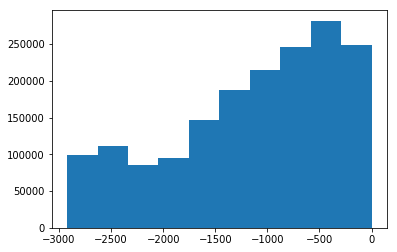

In [32]:
import matplotlib.pyplot as plt
tmp = bureau['DAYS_CREDIT']
plt.hist(tmp)

In [55]:
tmp = bureau[bureau['CREDIT_DAY_OVERDUE'] >0]

In [56]:
tmp.shape

(4217, 17)

In [44]:
bureau.shape

(1716428, 17)

In [46]:
tmp = bureau[bureau['DAYS_CREDIT_ENDDATE'] >=0]

In [47]:
tmp.shape

(603486, 17)

In [51]:
x = bureau['DAYS_CREDIT_ENDDATE'] > bureau['CREDIT_DAY_OVERDUE']
y = bureau['DAYS_CREDIT_ENDDATE'] < bureau['CREDIT_DAY_OVERDUE']

In [52]:
print(x.sum(), y.sum())

602496 1007495


In [57]:
x = bureau['DAYS_CREDIT_ENDDATE'] > bureau['DAYS_ENDDATE_FACT']
y = bureau['DAYS_CREDIT_ENDDATE'] < bureau['DAYS_ENDDATE_FACT']

In [58]:
print(x.sum(), y.sum())

487085 239064


In [62]:
tmp = bureau['AMT_CREDIT_MAX_OVERDUE'].fillna(0)

In [73]:
tmp = bureau[bureau['AMT_CREDIT_MAX_OVERDUE']>0]['AMT_CREDIT_MAX_OVERDUE'].fillna(0)

In [75]:
tmp

4          77674.500
7          14985.000
24           310.500
25         20493.270
26         88821.000
27          1350.000
44          3980.520
49          1800.000
81         18293.265
82         12618.000
98            40.500
99          6007.500
125        11250.000
126         6492.420
132         3285.000
133         1704.780
183         3727.890
184        13590.000
189         2189.205
190        13225.725
199         3520.800
200         1856.340
212        20880.000
217        10732.680
219        18639.135
220         7420.500
225           35.055
232         6457.500
236        21161.115
237        25470.000
             ...    
1715822     4995.000
1715832     5209.830
1715836     5240.340
1715883    11641.500
1715939       45.000
1715964     6955.560
1715969     5940.000
1715975     2065.500
1716030    13950.000
1716048     7234.110
1716069      869.490
1716106     5407.020
1716107     4603.140
1716122     6684.390
1716179    95276.205
1716220     7155.000
1716230    13

In [77]:
(bureau['CNT_CREDIT_PROLONG']==0).sum()

1707314

In [79]:
(bureau['CNT_CREDIT_PROLONG']>0).sum()

9114

In [80]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [85]:
cols = ['AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE']

In [91]:
for i in cols:
    for j in cols:
        if j!= i:
#             print('{}_and_{}'.format(i,j))
            tmp1 =(bureau[i] > bureau[j]).sum()
            tmp2 = (bureau[i] == bureau[j]).sum()
            tmp3 =  (bureau[i]< bureau[j]).sum()
            print('{}_{}_{}'.format(tmp1,tmp2,tmp3), 'for {}_and_{}'.format(i,j))

121285_465376_5279 for AMT_CREDIT_MAX_OVERDUE_and_CNT_CREDIT_PROLONG
2945_25437_563558 for AMT_CREDIT_MAX_OVERDUE_and_AMT_CREDIT_SUM
76538_298273_134019 for AMT_CREDIT_MAX_OVERDUE_and_AMT_CREDIT_SUM_DEBT
82576_358748_63905 for AMT_CREDIT_MAX_OVERDUE_and_AMT_CREDIT_SUM_LIMIT
120895_471044_1 for AMT_CREDIT_MAX_OVERDUE_and_AMT_CREDIT_SUM_OVERDUE
5279_465376_121285 for CNT_CREDIT_PROLONG_and_AMT_CREDIT_MAX_OVERDUE
971_65611_1649833 for CNT_CREDIT_PROLONG_and_AMT_CREDIT_SUM
11620_1013233_433906 for CNT_CREDIT_PROLONG_and_AMT_CREDIT_SUM_DEBT
2963_1047535_74150 for CNT_CREDIT_PROLONG_and_AMT_CREDIT_SUM_LIMIT
9082_1703188_4158 for CNT_CREDIT_PROLONG_and_AMT_CREDIT_SUM_OVERDUE
563558_25437_2945 for AMT_CREDIT_SUM_and_AMT_CREDIT_MAX_OVERDUE
1649833_65611_971 for AMT_CREDIT_SUM_and_CNT_CREDIT_PROLONG
1359223_69881_29642 for AMT_CREDIT_SUM_and_AMT_CREDIT_SUM_DEBT
1045862_69901_8885 for AMT_CREDIT_SUM_and_AMT_CREDIT_SUM_LIMIT
1649797_66503_115 for AMT_CREDIT_SUM_and_AMT_CREDIT_SUM_OVERDUE
134019_29

In [92]:
bureau.isnull().sum()/len(bureau)

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

In [93]:
b_sum = bureau[cols]
b_sum.head()

,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,NaN,0,91323.0,0.0,NaN,0.0
1,NaN,0,225000.0,171342.0,NaN,0.0
2,NaN,0,464323.5,NaN,NaN,0.0
3,NaN,0,90000.0,NaN,NaN,0.0
4,77674.5,0,2700000.0,NaN,NaN,0.0


In [140]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

(array([ 37319.,  39742.,  43831.,  46294.,  42495.,  40694.,  31965.,
         27860.,  35982.,  44711.,  52228.,  61134.,  70022.,  71493.,
         79588.,  85755.,  84753.,  89727.,  98221., 102032., 107450.,
        115528., 118001., 111271.,  78332.]),
 array([-2922.  , -2805.12, -2688.24, -2571.36, -2454.48, -2337.6 ,
        -2220.72, -2103.84, -1986.96, -1870.08, -1753.2 , -1636.32,
        -1519.44, -1402.56, -1285.68, -1168.8 , -1051.92,  -935.04,
         -818.16,  -701.28,  -584.4 ,  -467.52,  -350.64,  -233.76,
         -116.88,     0.  ]),
 <a list of 25 Patch objects>)

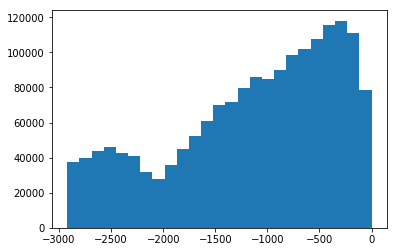

In [95]:
tmp = bureau['DAYS_CREDIT'] 
plt.hist(tmp,bins=25)

# Amt owed related

In [141]:
prolong = bureau[bureau['CNT_CREDIT_PROLONG'] !=0]

In [142]:
prolong.shape

(9114, 17)

# Days related

In [143]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [152]:
day_cols = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE']
for i in day_cols:
    for j in day_cols:
        if j != i:
            tmp1 = (bureau[i] < bureau[j]).sum()
            tmp2 = (bureau[i] == bureau[j]).sum()
            tmp3 = (bureau[i] > bureau[j]).sum()
            s = tmp1+tmp2+tmp3
            print('{}_and_{}'.format(i,j))
            print(tmp1, tmp2, tmp3,s)

DAYS_CREDIT_and_CREDIT_DAY_OVERDUE
1716403 25 0 1716428
DAYS_CREDIT_and_DAYS_CREDIT_ENDDATE
1609717 994 164 1610875
DAYS_CREDIT_and_DAYS_ENDDATE_FACT
1080735 2020 20 1082775
DAYS_CREDIT_and_DAYS_CREDIT_UPDATE
1706919 9374 135 1716428
CREDIT_DAY_OVERDUE_and_DAYS_CREDIT
0 25 1716403 1716428
CREDIT_DAY_OVERDUE_and_DAYS_CREDIT_ENDDATE
602496 884 1007495 1610875
CREDIT_DAY_OVERDUE_and_DAYS_ENDDATE_FACT
0 64 1082711 1082775
CREDIT_DAY_OVERDUE_and_DAYS_CREDIT_UPDATE
17 604 1715807 1716428
DAYS_CREDIT_ENDDATE_and_DAYS_CREDIT
164 994 1609717 1610875
DAYS_CREDIT_ENDDATE_and_CREDIT_DAY_OVERDUE
1007495 884 602496 1610875
DAYS_CREDIT_ENDDATE_and_DAYS_ENDDATE_FACT
239064 323837 487085 1049986
DAYS_CREDIT_ENDDATE_and_DAYS_CREDIT_UPDATE
623912 97514 889449 1610875
DAYS_ENDDATE_FACT_and_DAYS_CREDIT
20 2020 1080735 1082775
DAYS_ENDDATE_FACT_and_CREDIT_DAY_OVERDUE
1082711 64 0 1082775
DAYS_ENDDATE_FACT_and_DAYS_CREDIT_ENDDATE
487085 323837 239064 1049986
DAYS_ENDDATE_FACT_and_DAYS_CREDIT_UPDATE
769988 31